In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
data = pd.read_csv('Crop_recommendation.csv')

In [4]:
# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
data.info()
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1

<ipython-input-5-cf48e0b9a4b6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True, color='blue')


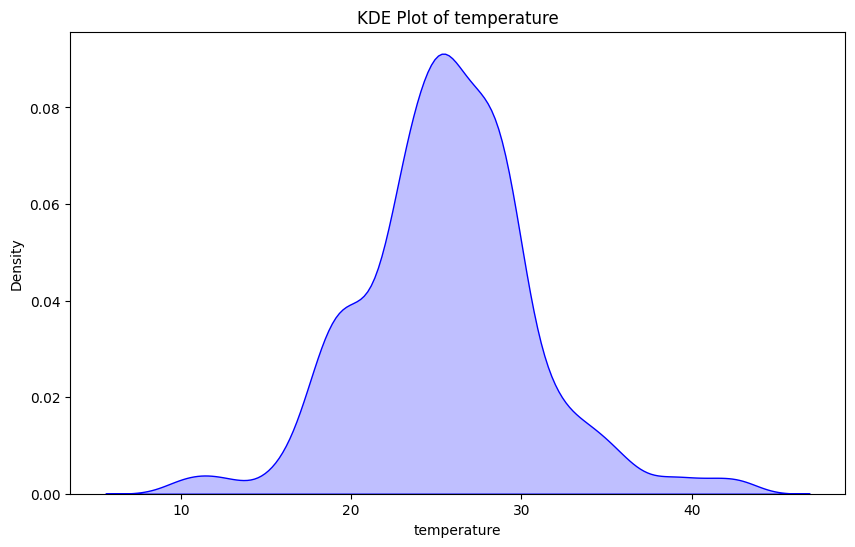

In [5]:
feature = 'temperature'

# KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(data[feature], shade=True, color='blue')
plt.title(f'KDE Plot of {feature}')
plt.xlabel(feature)
plt.ylabel('Density')
plt.show()

<ipython-input-6-a1a8290c7738>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True, label=feature)
<ipython-input-6-a1a8290c7738>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True, label=feature)
<ipython-input-6-a1a8290c7738>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True, label=feature)
<ipython-input-6-a1a8290c7738>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True, label=feature)


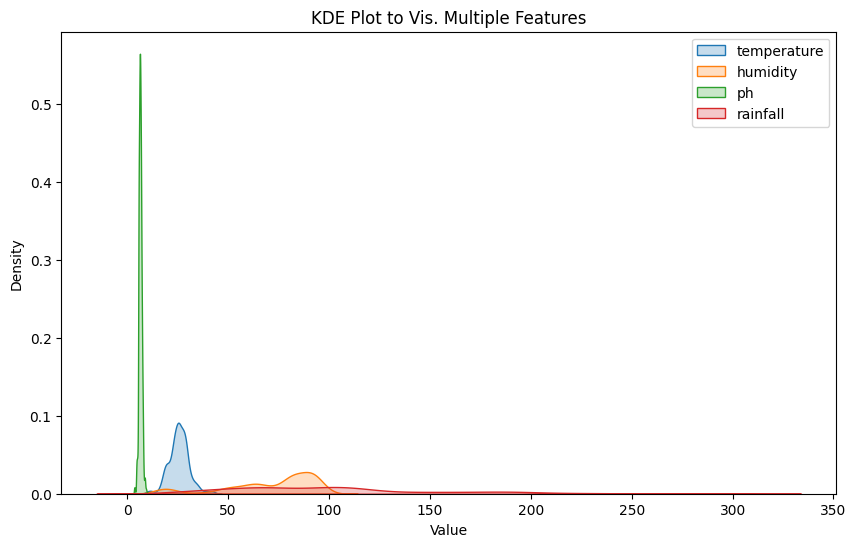

In [6]:
features = ['temperature', 'humidity', 'ph', 'rainfall']

# Create a KDE plot for each feature
plt.figure(figsize=(10, 6))
for feature in features:
    sns.kdeplot(data[feature], shade=True, label=feature)
plt.title('KDE Plot to Vis. Multiple Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

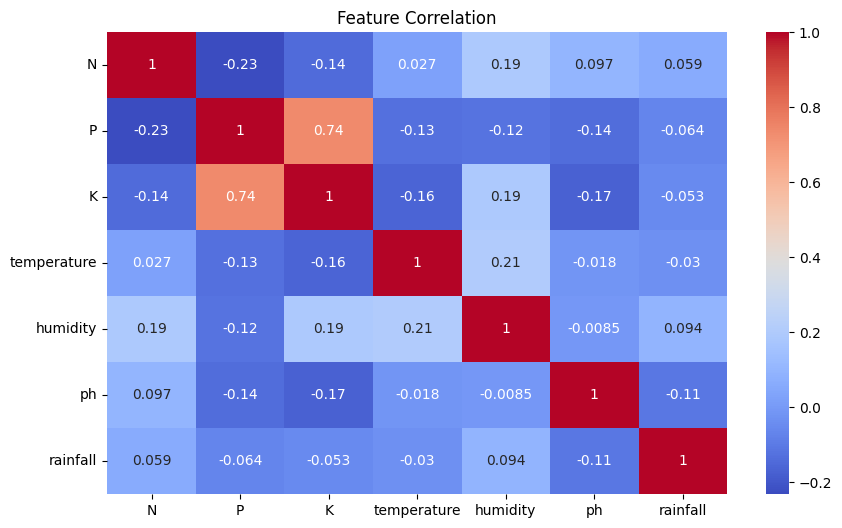

In [7]:
# Visualize correlations
plt.figure(figsize=(10, 6))

# Select only numeric features for correlation calculation
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

plt.title('Feature Correlation')
plt.show()

In [8]:
# Splitting features and target
X = data.drop('label', axis=1) # drops label
y = data['label']
print(data)
print(X)
print(y)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]
        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.50

In [9]:
# Encoding the target variable
y_encoded = pd.factorize(y)[0]  # Encode crop names as integers
print(y_encoded)

[ 0  0  0 ... 21 21 21]


In [10]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
#print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.32%


In [13]:
# Validating using our own data.

mydata = [90,  42,  43,    20.879744,  82.002744,  6.502985,  202.935536]
#pd.DataFrame
mydata = np.array(mydata).reshape(1,-1)

result = rf_model.predict(mydata)
print(result)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
# Perform cross-validation
model = RandomForestClassifier()
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.99772727 0.99545455 0.99545455 0.99545455 0.98636364]
Mean cross-validation score: 0.9940909090909091


In [14]:
# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      0.96      0.98        24
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        20
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        14
   


Confusion Matrix:


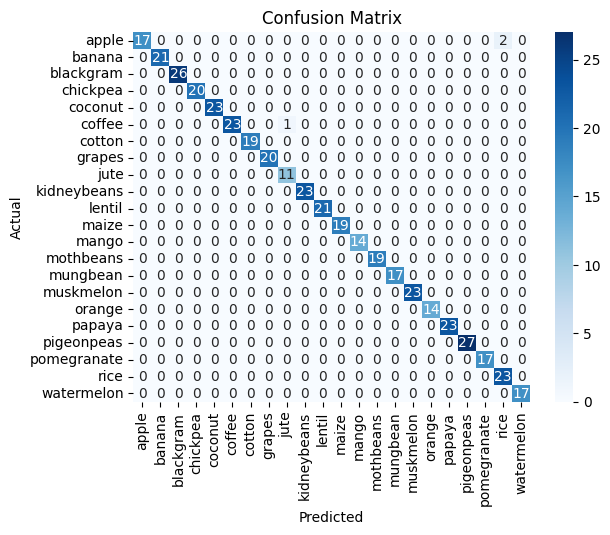

In [15]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Cross-validation scores: [0.99318182 0.99318182 0.99772727 0.99545455 0.98636364]
Mean cross-validation score: 0.9931818181818182


In [17]:
# Save the Model
joblib.dump(rf_model, 'crop_recommendation_model.pkl')
print("Model saved as 'crop_recommendation_model.pkl'")

Model saved as 'crop_recommendation_model.pkl'
